In [78]:
import re
import pandas as pd

pd.set_option('display.max_columns', None)

In [79]:
%%time
df = pd.read_csv('chess_games.csv', nrows=1000000,
                usecols=['Event', 'Result', 'UTCDate', 'Opening', 'Termination', 'AN']) # chunksize=100000, index_col=''

CPU times: total: 10.4 s
Wall time: 13.1 s


In [80]:
df.head(3)

,Event,Result,UTCDate,Opening,Termination,AN
0,Classical,1-0,2016.06.30,Slav Defense,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,0-1,2016.06.30,King's Pawn Opening: 2.b3,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,1-0,2016.06.30,Scandinavian Defense: Mieses-Kotroc Variation,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....


In [81]:
filt = (df['Result'] != '*') & (df['Termination'] != 'Abandoned') & (df['Termination'] != 'Rules infraction')
df = df[filt]

In [82]:
df['UTCDate'] = pd.to_datetime(df['UTCDate'])

In [83]:
df['Tournament'] = df['Event'].str.contains('tournament')

In [84]:
df['Event'] = df['Event'].map({' Classical ': 'Classical',
                               ' Blitz ': 'Blitz',
                               ' Blitz tournament ': 'Blitz',
                               ' Correspondence ': 'Classical',
                               ' Classical tournament ': 'Classical',
                               ' Bullet tournament ': 'Bullet',
                               ' Bullet ': 'Bullet',
                               'Blitz tournament ': 'Blitz',
                               'Bullet ': 'Bullet',
                               'Classical ': 'Classical',
                               'Blitz ': 'Blitz'
                               })

In [85]:
df.head()

,Event,Result,UTCDate,Opening,Termination,AN,Tournament
0,Classical,1-0,2016-06-30,Slav Defense,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,False
1,Blitz,0-1,2016-06-30,King's Pawn Opening: 2.b3,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...,False
2,Blitz,1-0,2016-06-30,Scandinavian Defense: Mieses-Kotroc Variation,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....,True
3,Classical,1-0,2016-06-30,Van't Kruijs Opening,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...,False
4,Blitz,0-1,2016-06-30,"Sicilian Defense: Najdorf, Lipnitsky Attack",Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,True


In [86]:
filt = df["AN"].apply(len) > 50
df = df[filt]

In [87]:
#filt = (df["AN"].apply(len) == 100) & (df["Termination"] == 'Time forfeit')
#df[filt]

In [88]:
# value_counts = df.stack().value_counts() # Entire DataFrame 
# to_remove = value_counts[value_counts <= 1500].index
# df.replace(to_remove, np.nan, inplace=True)

In [89]:
vc = df['Opening'].value_counts()
vals_to_remove = vc[vc <= 1500].index.values
df['Opening'].loc[df['Opening'].isin(vals_to_remove)] = '111'
filt = df['Opening'] != '111'
df = df[filt]

In [90]:
df = df.reset_index(drop=True)

In [91]:
def get_moves_as_list(row) -> list:
    ori_list = []
    # ori_list.append(df.loc[row, 'AN'])
    ori_list.append(row)
    sep_num = 2
    while True:
        separator = str(sep_num)+'.'
        if separator in ori_list[-1]:
            ori_list = ori_list[0:-1] + ori_list[-1].split(' '+separator) # concatenate all previous moves and remainder
            ori_list[-1] = separator + ori_list[-1]
            sep_num+=1
        else:
            ori_list[-1] = re.sub(' 1-0', '', ori_list[-1])
            ori_list[-1] = re.sub(' 0-1', '', ori_list[-1])
            ori_list[-1] = re.sub(' 1/2-1/2', '', ori_list[-1])
            break
    return ori_list

In [92]:
%%time
df["AN"] = df["AN"].apply(get_moves_as_list)

CPU times: total: 48.1 s
Wall time: 50.6 s


In [93]:
# for row in range(df.shape[0]):
#     cell = df.loc[row, 'AN']
#     if type(cell) == str:
#         cell = get_moves_as_list(row)
#     else:
#         print(f'In row {row} value is a {type(cell)}')

<Axes: >

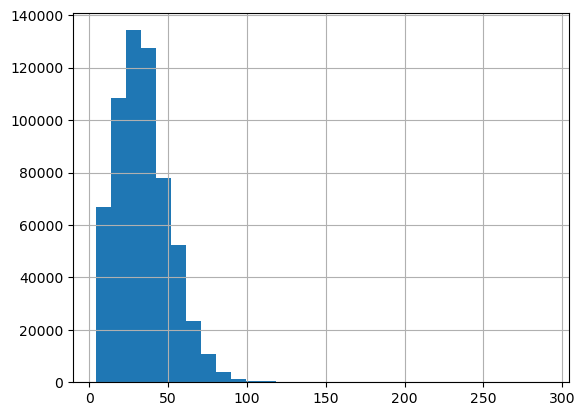

In [97]:
df["AN"].str.len().hist(bins=30)

In [ ]:
filt = df["AN"].str.len() == 6119
df.loc[52412, 'AN']